### Домашня работа 2.
### Логистическая регрессия. Работа с признаками


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 15 баллов. Можно получить 4.5 бонусных балла.

Неэффективная реализация кода может негативно отразиться на оценке.

In [1]:
print('Всем удачи!👒 Тут она точно пригодится.')

Всем удачи!👒 Тут она точно пригодится.


In [2]:
%pylab inline
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Часть 1. Логистическая регрессия своими руками (4 балла)

Реализуйте логистическую регрессию, обучаемую с помощью:

**Задание 1 (1.5 балла). Градиентного спуска**

**Задание 2 (1.5 балла). Стохастического градиентного спуска**

Во всех пунктах необходимо соблюдать следующие условия:
- Градиентный спуск необходимо записать в векторном виде
- Циклы средствами python допускается использовать только для итераций градиентного спуска;
- В качестве критерия останова необходимо использовать (одновременно):

        проверку на евклидову норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$) задаваемого параметром `tolerance`;


        достижение максимального числа итераций (например, 10000), задаваемого параметром `max_iter`.

Чтобы проследить, что оптимизационный процесс действительно сходится, будем использовать атрибут класса loss_history. В нём после вызова метода fit должны содержаться значения функции потерь для всех итераций, начиная с первой (до совершения первого шага по антиградиенту);

Инициализировать веса можно случайным образом или нулевым вектором.

Полезно [почитать](https://scikit-learn.org/stable/developers/develop.html).

In [3]:
import numpy as np
from sklearn.base import BaseEstimator

class LogReg(BaseEstimator):
    def __init__(self, gd_type='stochastic', 
                 tolerance= 1e-4, max_iter= 1000, w0= None, eta= 1e-2):
        """
        gd_type: 'full' or 'stochastic' 
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) — init weights
        eta: learning rate
        """
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration
    
    def fit(self, X, y):
        """
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: self
        """
        self.loss_history = []
        #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        return self
    
    
    def predict_proba(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        pass
    
    
    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        pass
    
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (ell, d) (ell can be equal to 1 if stochastic)
        y: np.array of shape (ell)
        ---
        output: np.array of shape (d)
        """
        #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        pass

    def calc_loss(self, X, y):
        """
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: float 
        """ 
        #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        pass

Синтетические данные

In [4]:
%pylab inline
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, auc, precision_recall_curve, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [5]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

**Важно:** далее предполагается, что вы используете собственную реализацию логистической регрессии.
Если с написанием класса возникли проблемы, используйте реализацию sklearn, чтобы не терять баллы за остальные задания.

**Задание 3 (1 балл)**

Обучите логистическую регрессию на синтетических данных.

In [6]:
lr = LogisticRegression(random_state= 0)

lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые. Проинтерпретируйте результат.

Test ROC-AUC: 0.9259026444596383
Test PR-AUC: 0.9249737692008276


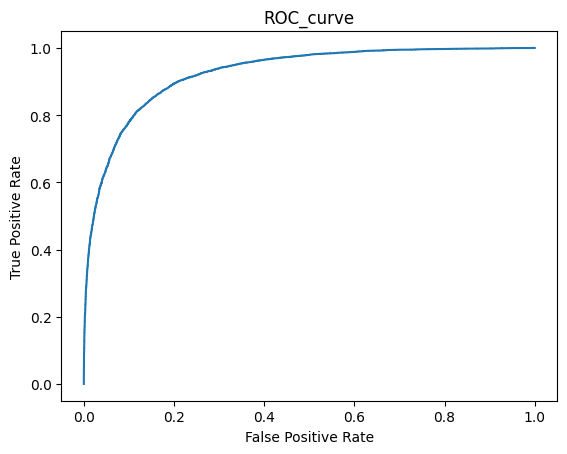

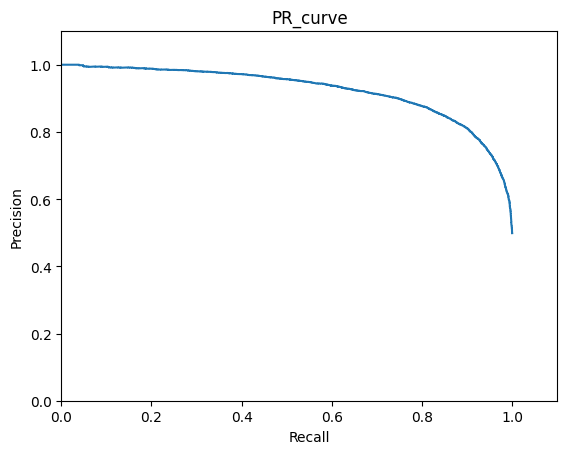

In [7]:
pred_proba = lr.predict_proba(X_test)[:, 1]

print("Test ROC-AUC:", roc_auc_score(y_test, pred_proba))

def plot_roc_curve(true_y, y_prob):
    """
    Возвращает ROC кривую на основе вероятностей
    """
    fpr, tpr, _ = roc_curve(true_y, y_prob)
    plt.title('ROC_curve')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


plot_roc_curve(y_test, pred_proba)

precision, recall, _ = precision_recall_curve(y_test, pred_proba)
plt.figure()
plt.plot(recall, precision)
plt.ylim([0, 1.1]);plt.xlim([0, 1.1])
plt.xlabel('Recall');plt.ylabel('Precision')
plt.title('PR_curve')

print("Test PR-AUC:", auc(recall, precision))

## Часть 2. Работа с категориальными переменными (3 балла)

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

__Подготовка данных.__

Загрузим данные с конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом для задания мы немного модифицируем датасет.

In [9]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.


In [10]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size= 0.5)

**Задание 5 (0 баллов).** Посчитайте качество (в этом задании будем работать c ROC-AUC) на исходных признаках при применении логистической регрессии.

In [11]:
lr = LogisticRegression(random_state= 0, solver='lbfgs')
lr.fit(X_train, y_train)

print("Test ROC_AUC_score:", roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))

Test ROC_AUC_score: 0.6237661597822327


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Задание 6 (0.5 балла).** Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на обучение модели.

Из описания данных на Kaggle категориальным считается признак у которого в имени стоит _cat, бинарным считается признак, в имени которого стоит _bin.

In [22]:
data_categories = dict()
for i in data:
    if ('_bin' in i) or ('_cat' in i):
        data_categories[i] = data[i].nunique()

max_unique_cat = max(data_categories, key=data_categories.get)

print(max_unique_cat, '-', data_categories[max_unique_cat])

del data_categories[max_unique_cat]

ps_car_11_cat - 104


Признак ps_car_11_cat у которого 104 уникальных значения сильно увеличит признаковое пространство, поэтому попробую убрать его из категориальных. 

In [23]:
data

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
783681,0,2,0,1,0,1,0,0,0,0,...,3,1,5,9,0,0,1,0,1,0
636497,0,1,6,1,0,0,1,0,0,0,...,5,2,1,10,0,1,1,0,1,0
659813,2,1,3,1,0,1,0,0,0,0,...,3,1,1,8,0,1,1,0,0,0
334742,0,1,10,0,0,1,0,0,0,0,...,7,2,2,11,0,0,1,1,0,0
1156570,0,1,9,0,6,1,0,0,0,0,...,8,1,1,8,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6545,5,1,7,0,0,1,0,0,0,0,...,5,2,4,3,0,1,0,1,0,0
467767,3,2,8,1,0,0,0,0,1,0,...,6,2,5,8,0,1,1,0,0,0
674581,2,1,6,0,0,1,0,0,0,0,...,5,1,5,8,0,0,0,0,0,0


In [28]:
cat_data = data[list(data_categories.keys())]
data.drop(list(data_categories.keys()), axis= 1, inplace= True)

In [29]:
data

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11_cat,ps_car_11,ps_car_12,...,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
id,,,,,,,,,,,,,,,,,,,,,
783681,0,0,0,11,0.6,0.3,0.997497,32,1,0.316228,...,0,9,3,10,1,8,3,1,5,9
636497,0,6,0,13,0.4,0.0,1.258720,72,3,0.400000,...,0,6,3,9,3,9,5,2,1,10
659813,2,3,0,7,0.9,1.4,1.554831,104,3,0.374166,...,1,6,5,10,2,11,3,1,1,8
334742,0,10,0,10,0.9,0.4,0.694172,5,2,0.400000,...,2,6,5,6,4,9,7,2,2,11
1156570,0,9,0,6,0.5,0.4,0.818153,27,3,0.374166,...,1,8,2,7,2,6,8,1,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6545,5,7,0,0,0.9,1.6,1.963256,28,3,0.387298,...,2,6,2,10,3,9,5,2,4,3
467767,3,8,0,11,0.9,0.8,1.153256,104,2,0.316070,...,1,9,6,11,5,9,6,2,5,8
674581,2,6,0,10,0.9,0.3,0.772172,11,2,0.316228,...,2,8,6,12,3,8,5,1,5,8


In [45]:
encoder = OneHotEncoder(drop= 'first')
encoder.fit(cat_data)

array(['ps_ind_02_cat_1', 'ps_ind_02_cat_2', 'ps_ind_02_cat_3',
       'ps_ind_02_cat_4', 'ps_ind_04_cat_0', 'ps_ind_04_cat_1',
       'ps_ind_05_cat_0', 'ps_ind_05_cat_1', 'ps_ind_05_cat_2',
       'ps_ind_05_cat_3', 'ps_ind_05_cat_4', 'ps_ind_05_cat_5',
       'ps_ind_05_cat_6', 'ps_ind_06_bin_1', 'ps_ind_07_bin_1',
       'ps_ind_08_bin_1', 'ps_ind_09_bin_1', 'ps_ind_10_bin_1',
       'ps_ind_11_bin_1', 'ps_ind_12_bin_1', 'ps_ind_13_bin_1',
       'ps_ind_16_bin_1', 'ps_ind_17_bin_1', 'ps_ind_18_bin_1',
       'ps_car_01_cat_0', 'ps_car_01_cat_1', 'ps_car_01_cat_2',
       'ps_car_01_cat_3', 'ps_car_01_cat_4', 'ps_car_01_cat_5',
       'ps_car_01_cat_6', 'ps_car_01_cat_7', 'ps_car_01_cat_8',
       'ps_car_01_cat_9', 'ps_car_01_cat_10', 'ps_car_01_cat_11',
       'ps_car_02_cat_1', 'ps_car_03_cat_0', 'ps_car_03_cat_1',
       'ps_car_04_cat_1', 'ps_car_04_cat_2', 'ps_car_04_cat_3',
       'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6',
       'ps_car_04_cat_7', 'ps_car_04_c

In [46]:
cat_data = pd.DataFrame(encoder.fit_transform(cat_data).toarray())
cat_data.columns = encoder.get_feature_names_out()

In [47]:
cat_data

,ps_ind_02_cat_1,ps_ind_02_cat_2,ps_ind_02_cat_3,ps_ind_02_cat_4,ps_ind_04_cat_0,ps_ind_04_cat_1,ps_ind_05_cat_0,ps_ind_05_cat_1,ps_ind_05_cat_2,ps_ind_05_cat_3,...,ps_car_09_cat_3,ps_car_09_cat_4,ps_car_10_cat_1,ps_car_10_cat_2,ps_calc_15_bin_1,ps_calc_16_bin_1,ps_calc_17_bin_1,ps_calc_18_bin_1,ps_calc_19_bin_1,ps_calc_20_bin_1
0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
199996,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
199997,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199998,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [75]:
for i in data:
    print(i, data[i].nunique())

ps_ind_01 8
ps_ind_02_cat 5
ps_ind_03 12
ps_ind_04_cat 3
ps_ind_05_cat 8
ps_ind_06_bin 2
ps_ind_07_bin 2
ps_ind_08_bin 2
ps_ind_09_bin 2
ps_ind_10_bin 2
ps_ind_11_bin 2
ps_ind_12_bin 2
ps_ind_13_bin 2
ps_ind_14 5
ps_ind_15 14
ps_ind_16_bin 2
ps_ind_17_bin 2
ps_ind_18_bin 2
ps_reg_01 10
ps_reg_02 19
ps_reg_03 4636
ps_car_01_cat 13
ps_car_02_cat 2
ps_car_03_cat 3
ps_car_04_cat 10
ps_car_05_cat 3
ps_car_06_cat 18
ps_car_07_cat 3
ps_car_08_cat 2
ps_car_09_cat 6
ps_car_10_cat 3
ps_car_11_cat 104
ps_car_11 5
ps_car_12 142
ps_car_13 34403
ps_car_14 769
ps_car_15 15
ps_calc_01 10
ps_calc_02 10
ps_calc_03 10
ps_calc_04 6
ps_calc_05 7
ps_calc_06 10
ps_calc_07 10
ps_calc_08 11
ps_calc_09 8
ps_calc_10 24
ps_calc_11 19
ps_calc_12 9
ps_calc_13 14
ps_calc_14 23
ps_calc_15_bin 2
ps_calc_16_bin 2
ps_calc_17_bin 2
ps_calc_18_bin 2
ps_calc_19_bin 2
ps_calc_20_bin 2


In [71]:
# # 
# df = data.copy()
# bin_column = list()


# # что бы не допустить раздувание признакового пространства будем считать категориальными признаками все признаки, в которых уникальных значений меньше 20
# for i in df:
#     if df[i].nunique() == 2:
#         bin_column.append(i)
#     elif (df[i].nunique() > 2) and (df[i].nunique() < 20):

        




#     df.rename(columns = {'old_col1':'new_col1'}, inplace = True)
#     print(type(i))
#     # print(i, data[i].nunique())

Как можно было заменить, one-hot-кодирование сильно увилечивает количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

__Задание 7 (1.5 балла).__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше, без каких-либо хитростей). Обучите логистическую регрессию и посмотрите на качество модели на тестовом множестве. Сравните время обучения с предыдущим экспериментом. Заметили ли вы что-то интересное?


In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо так, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки. 

__Задание 8 (1 балл)__. Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (необходимо соблюсти баланс между избавление от переобучения и полезностью признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы.


In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

## Часть 3. Отбор признаков (3 балла + 1 бонус)

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом они увеличивают время вычислений) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тому же датасету про обращение клиентов по страховым случаям. Обойдёмся без сэмплирования объектов.

In [ ]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — ROC-AUC. Обучите модель и посчитайте качество на тестовой выборке. Давайте запомним полученное значение.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

### Встроенные методы

Допустим, мы хотим оставить только 200 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded methods, так как он заложен в особенности модели.

__Задание 10 (1 балл).__ Оставьте 200 признаков с наибольшим модулем соответсвующего параметра линейной модели. Обучите модели заново и оцените её качество. Замерьте скорость такого отбора признаков.

Изменилось ли качество? Как?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки! Давайте сначала отнормируем признаки одним из способов, а только потом будем удалять признаки. 

Кстати, в таком случае надо пересчитать качество на всех признаках (сделайте это ниже). Если вы сделали нормирование признаков в самом начале, то попробуйте отобрать признаки на неотмасштабированных данных.

Что получилось?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

__Задание 10 (0.5 балла).__
Можно задать отбор признаков более функционально. Вспомним, что L1-регуляризация также умеет отбирать признаки. Понятно, что теперь нам будет сложнее оставить именно 200 лучших признаков, но возможно они нам и не нужны. Подберите коэффициент регуляризации и проверьте, как изменилось качество. Получилось ли добиться лучшего качества при менее чем 200 признаках?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

### Методы фильтрации

Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или  filter methods. 

В качестве такой функции будем считать t-статистику:

$$t(x) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $mu$, $sigma$, $n$ соответственно среднее, среднеквадратичное отклонение и количество объектов каждого из классов.

__Задание 11 (1 балл)__. Оставьте 200 признаков с наибольшим значением и замерьте качество. Не забудьте замерить скорость отбора признаков в этом случаев.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

### Методы-обёртки

__Задание 12 (бонус, 1 балл)__.


Заключительный из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не достигнем некоторого критерия (количество признаков или ухудшением качества).

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только на финальной оценке качества.

Сделайте одну итерацию и прикиньте, сколько времени займёт такой отбор признаков. Кажется, что чересчур. Давайте возьмём маленький сэмпл данных (например, в 10 тысяч объектов), что сильно уменьшит время итерации. Теперь это долго, но уже приемлимо. 

Если это всё ещё долго для вашего комьютера, можете попробовать брать не по одному признаку, а сразу по пять (и удалять сразу тоже по 5). Для этого перед каждой итерацией удаления делите заново все признаки на группы по 5 штук.

Снова оставьте только 200 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Опционально (это не оценивается) можете рассмотреть более интересные стратегии отбора, чем жадная. Например, генетические алгоритмы. Можно закодировать бинарным вектором, включаем мы или нет тот или иной признак в модель. А дальше генетическим алгоритмом оптимизировать этот вектор. Всё ещё не быстро, но точно быстрее жадного.


**Задание 13 (0.5 балла)** Давайте подведём итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству? Если не делали бонус — сравните встроенный метод и метод фильтрации.

**Ответ:** ...